In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/content/train_loan (1).csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**DATA** **PREPROCESSING**

In [6]:
# CHECKING DUPLICATION
data.duplicated().sum()

0

In [7]:
#checking missing values
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
#missing values found in 7 columns imputing missing values using mode in object type data and median in numerical data
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [9]:
#ensuring elimination of missing values
data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Encoding

In [10]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
#droping column loan id which does not have any meaning in data processing
data.drop('Loan_ID',axis=1,inplace=True)

In [12]:
#binary encoding in gender, male as 0 and female as 1
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
#binary encoding for married, no as 0 and yes as 1
data['Married'] = data['Married'].map({'No':0,'Yes':1})
#binary encoding for dependents, 0 as 0, 1 as 1, 2 as 2, 3+ as 3
data['Dependents'] = data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
#binary encoding for education, graduate as 1 and not graduate as 0
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0})
#binary encoding for self employed, no as 0 and yes as 1
data['Self_Employed'] = data['Self_Employed'].map({'No':0,'Yes':1})
#encoding for property_area ,rural as 0,semiurban as 1,urban as 2
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
#encoding loan status,y as 1 and n as 0
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0})



In [13]:
#ensuring completion pf encoding
data.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


{'whiskers': [<matplotlib.lines.Line2D at 0x794e449c4b50>,
 'caps': [<matplotlib.lines.Line2D at 0x794e4462a770>,
 'boxes': [<matplotlib.lines.Line2D at 0x794e449c4f40>],
 'medians': [<matplotlib.lines.Line2D at 0x794e44629570>],
 'fliers': [<matplotlib.lines.Line2D at 0x794e44629420>],
 'means': []}

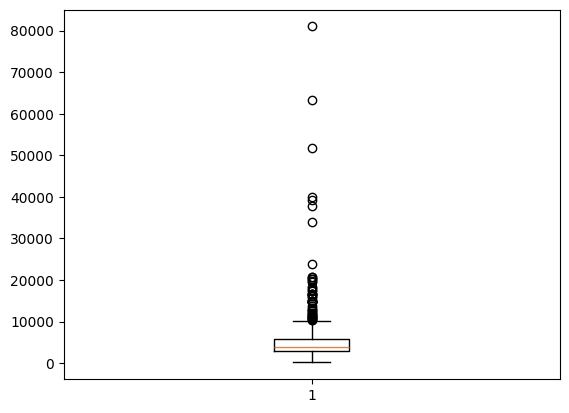

In [14]:
#outliers detection using boxplot
plt.boxplot(data['ApplicantIncome'])

In [15]:
#applicant income has too many outliers maximum of 80k it is also taking in to account. so that not removing outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x794e44695900>,
 'caps': [<matplotlib.lines.Line2D at 0x794e438dba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x794e446954b0>],
 'medians': [<matplotlib.lines.Line2D at 0x794e438d8160>],
 'fliers': [<matplotlib.lines.Line2D at 0x794e438d8400>],
 'means': []}

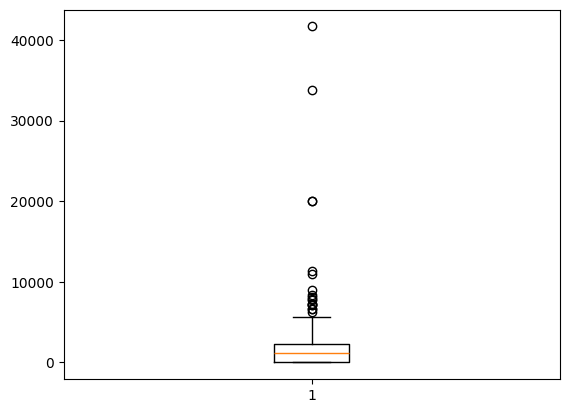

In [16]:
plt.boxplot(data['CoapplicantIncome'])

In [17]:
#here also too many outliers, because of the same reason above mentioned taking values as such.


{'whiskers': [<matplotlib.lines.Line2D at 0x794e41671450>,
 'caps': [<matplotlib.lines.Line2D at 0x794e416710f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x794e416716f0>],
 'medians': [<matplotlib.lines.Line2D at 0x794e41670bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x794e41670910>],
 'means': []}

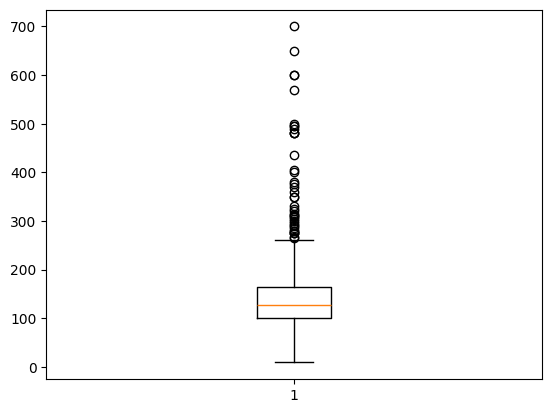

In [18]:
plt.boxplot(data['LoanAmount'])

In [19]:
#not removing outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x794e448891e0>,
 'caps': [<matplotlib.lines.Line2D at 0x794e448894e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x794e44e2a290>],
 'medians': [<matplotlib.lines.Line2D at 0x794e448880d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x794e448885b0>],
 'means': []}

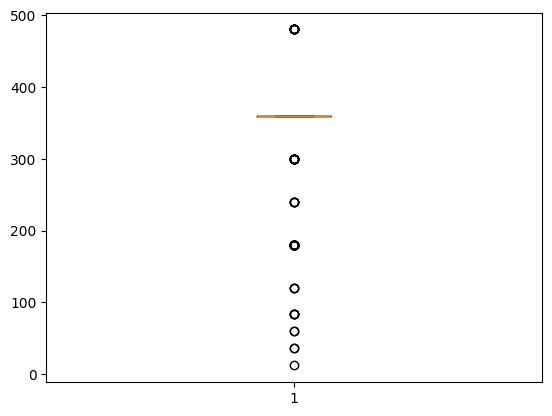

In [20]:
plt.boxplot(data['Loan_Amount_Term'])

In [21]:
#not removing outliers

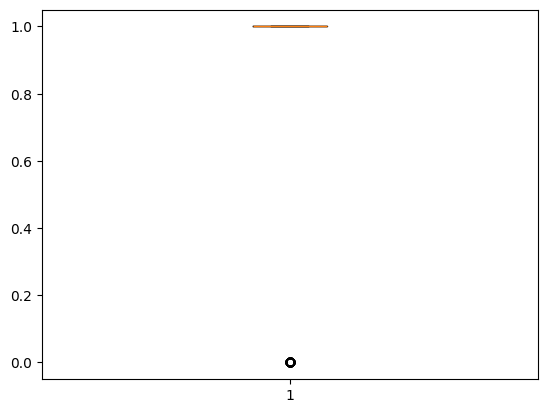

In [22]:
plt.boxplot(data['Credit_History'])
plt.show()

In [23]:
#removing outlier
data = data[data['Credit_History']<0.2]

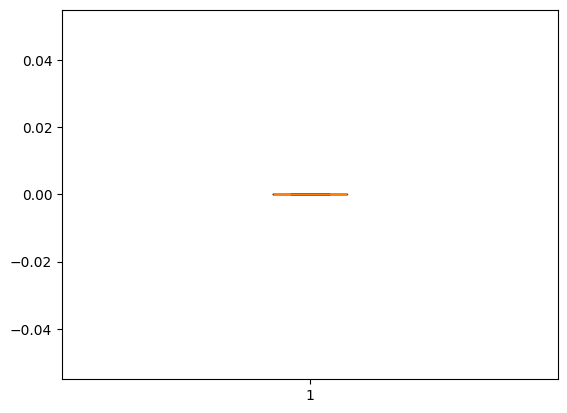

In [24]:
plt.boxplot(data['Credit_History'])
plt.show()

SCALING


In [25]:
#standard scaling for applicant income
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['ApplicantIncome'] = sc.fit_transform(data[['ApplicantIncome']])

In [26]:
#standard scaling for coapplicant income
data['CoapplicantIncome'] = sc.fit_transform(data[['CoapplicantIncome']])

**ENSEMBLE** **LEARNING**

In [27]:

x = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [28]:
#splitting of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred_dt)

0.6666666666666666

**Random** **Forest** **Classifier**

In [32]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.8888888888888888

**Bagging** **Classifier**

In [34]:
#Bagging classifier
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [35]:
y_pred_bg = bc.predict(x_test)
accuracy_score(y_test,y_pred_bg)

0.8888888888888888

**Support** **Vector** **Classifier**

In [36]:
from sklearn.svm import SVC
svc = SVC()

In [37]:
#to ensure y_train and y_test have the same proportion of each class as original dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, stratify=y, random_state=42)


In [38]:
bagg_clf = BaggingClassifier(estimator=svc,n_estimators=100,random_state=42)
bagg_clf.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=42)

In [39]:
y_pred1 = bagg_clf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.9444444444444444

**AdaBoost** **Classifier**

In [40]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [41]:
y_pred_ada = ada_boost.predict(x_test)
accuracy_score(y_test,y_pred_ada)

0.8333333333333334

**Gradient** **Boosting**

In [42]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(x_train,y_train)


GradientBoostingClassifier()

In [43]:
y_pred_gb = gb_clf.predict(x_test)
accuracy_score(y_test,y_pred_gb)

0.8888888888888888

**XG** **Boosting**

In [44]:
#XG boosting model
import xgboost as xgb

In [45]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred_xgb = xgb_model.predict(x_test)
accuracy_score(y_test,y_pred_xgb)

0.8333333333333334

CROSS VALIDATION

In [46]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Define base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Define an ensemble model (e.g., VotingClassifier)
ensemble = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the ensemble model using cross-validation
scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Cross-Validation Scores: [0.9   0.91  0.915 0.91  0.905]
Mean Accuracy: 0.908
Standard Deviation: 0.00509901951359279


Hperparameter tuning


In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Define parameter grids
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Perform grid search for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5)
grid_search_rf.fit(x_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best accuracy for Random Forest:", grid_search_rf.best_score_)

# Perform grid search for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, scoring='accuracy', cv=5)
grid_search_gb.fit(x_train, y_train)
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best accuracy for Gradient Boosting:", grid_search_gb.best_score_)

# Test the best models on the test set
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

rf_test_accuracy = accuracy_score(y_test, best_rf.predict(x_test))
gb_test_accuracy = accuracy_score(y_test, best_gb.predict(x_test))

print("Test accuracy for the best Random Forest model:", rf_test_accuracy)
print("Test accuracy for the best Gradient Boosting model:", gb_test_accuracy)

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Best accuracy for Random Forest: 0.9019047619047619
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best accuracy for Gradient Boosting: 0.9161904761904763
Test accuracy for the best Random Forest model: 0.9444444444444444
Test accuracy for the best Gradient Boosting model: 0.9444444444444444
